# Serial no of strategies

In [ ]:
# For All models the Kaggle scores screenshots are attached below them in Training IPYNBs too. 
# In this notebook we compare all models we tried including ML and DL.

In [ ]:
# private best is 0.73 is 757 rank out of 5558 people thats among top 13 %.
# public best is  0.86 is 4450 rank out of 5558 people thats among top 80 %.

In [ ]:
# New
# Models and scores
# Total no of submissions this competition has got is 5558
#           Private   Public   Private_Rank   In_top%
# ML models
# 'M0.1' :  5.09      5.16
# 'M0.2' :  2.67      2.84

# 'M3.1' :  0.91      0.86     1980         35.62%
# 'M3.2' :  0.91      0.94
# 'M3.3' :  0.85      0.91
# 'M3.4' :  0.89      0.94
# 'M3.5' :  0.94      0.86
# 'M3.6' :  0.87      0.88

# 'M4.1' :  4.90      4.99
# 'M4.2' :  4.90      5.29

# 'M5.1' :  0.84      1.26      
# 'M5.2' :  0.95      1.11
# 'M5.3' :  5.05      4.93

# 'M7.1' :  0.73      0.92      757          13.62%
# 'M7.2' :  0.94      1.08      2150         37.78%


# Neural network models
# NN M3  :  1.12      0.99
# NN M4  :  0.82      1.21      1933         34%
# NN M5  :  1.90      1.70
# NN M6  :  3.58      4.30

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
path = 'C:/Users/iamsh/Desktop/CS1 Kaggle Files/ML/'

In [2]:
# This dictionary maps serial no of ML models by their submission CSVs. DL model is given at last of dictionary as NN1.
d_ml = {'M0.1':'submissible_st_0.1.csv' , 'M0.2':'submissible_st_0.2.csv' ,'M3.1':'submissible_st_3.1.csv',
        'M3.2':'submissible_st_3.2.csv' , 'M3.3':'submissible_st_3.3.csv' ,'M3.4':'submissible_st_3.4.csv',
        'M3.5':'submissible_st_3.5.csv' ,'M3.6':'submissible_st_3.6.csv' ,'M4.1':'submissible_st_4.1.csv' ,
        'M4.2':'submissible_st_4.2.csv', 'M5.1':'submissible_st_5.1.csv', 'M7.1':'submissible_st_7.1.csv',
        'M7.2':'submissible_st_7.2.csv',
     
        'NN3': 'submissible_nn_M3.csv', 'NN4':'submissible_nn_M4.csv', 'NN5':'submissible_nn_M5.csv',
        'NN6':'submissible_nn_M6.csv'}

# Plotting outputs of all models side by side for some top selling products.

These outputs are predictions and has no corresponding true labels. For products in evaluation data these outputs correpond to 28 days of 1942 to 1969 and for validation data these outputs correspond to 28 days of 1914 to 1941. 

However the best output can be compared with others.

In [12]:
def rf(name):                     # Reading Funciton for CSV of submission file for given serial no of model
    return pd.read_csv(path+name)

def plot_products(products):
    for j in products:
        plt.figure(figsize=(20, 10))
        for i in d_ml.values():
            if i == 'submissible_st_7.1.csv':
                plt.plot(list(rf(i)[rf(i).id == j].iloc[:,1:].iloc[0]), color = 'black')
            else:
                plt.plot(list(rf(i)[rf(i).id == j].iloc[:,1:].iloc[0]))
        plt.title(str(j))
        plt.legend(d_ml.keys())
        plt.xlabel('Days 1 to 28')
        plt.ylabel('Predicted unit sales')

        plt.show()

In [12]:
# These items are top sellers in their own category we will see how the models predicted for them.
# The best model 7.1 has been given color black.

# 'HOBBIES_1_234_CA_3_evaluation' 'HOUSEHOLD_1_118_CA_3_evaluation' 'FOODS_3_090_CA_3_evaluation' 

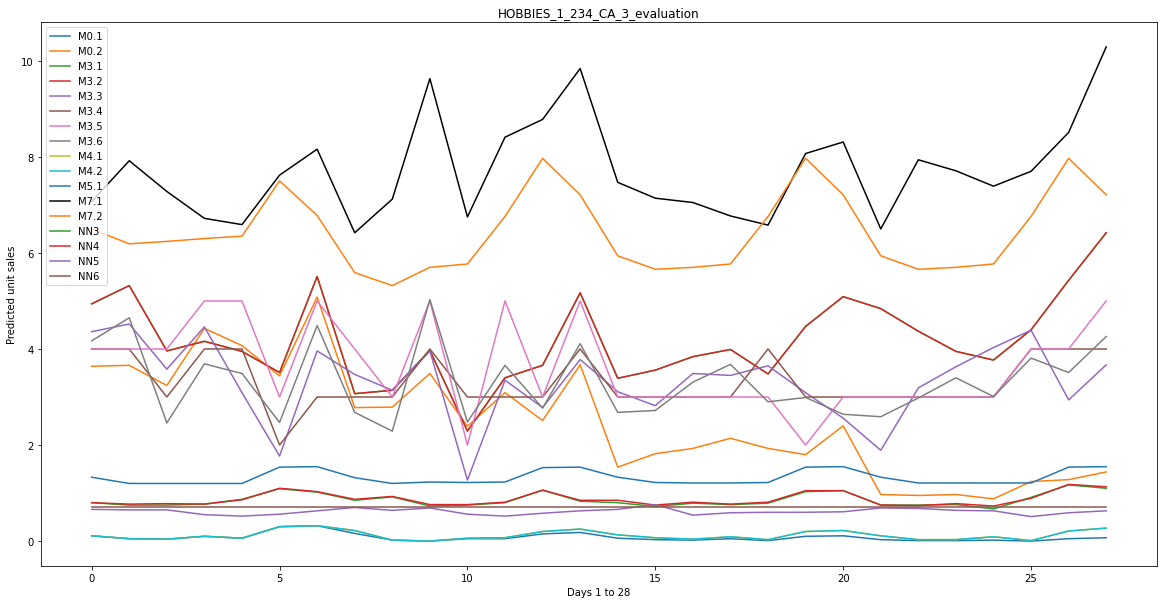

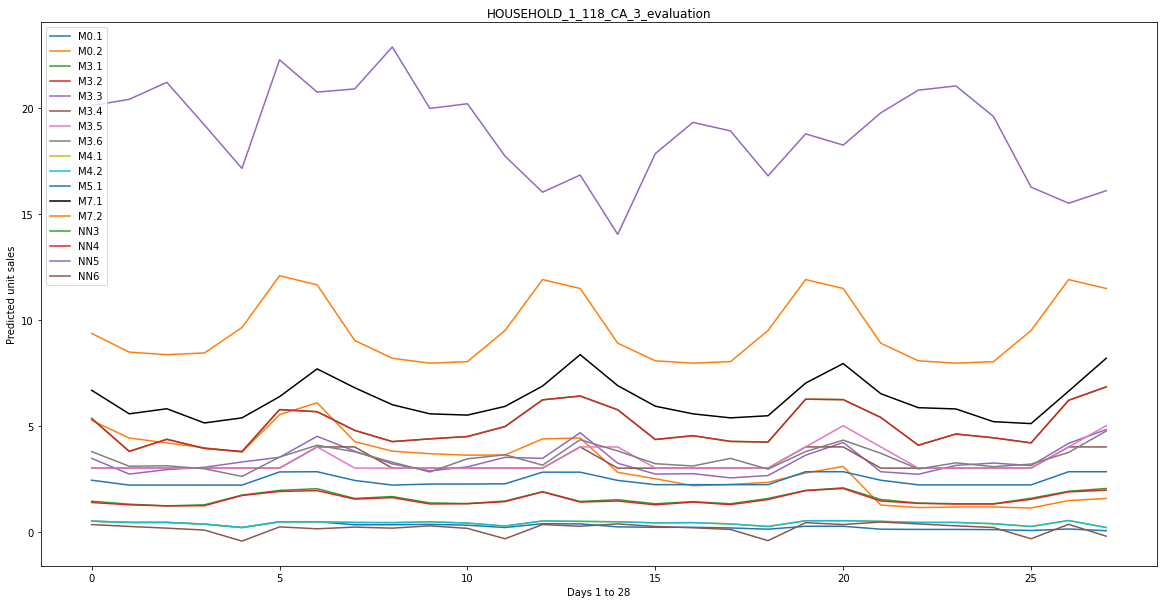

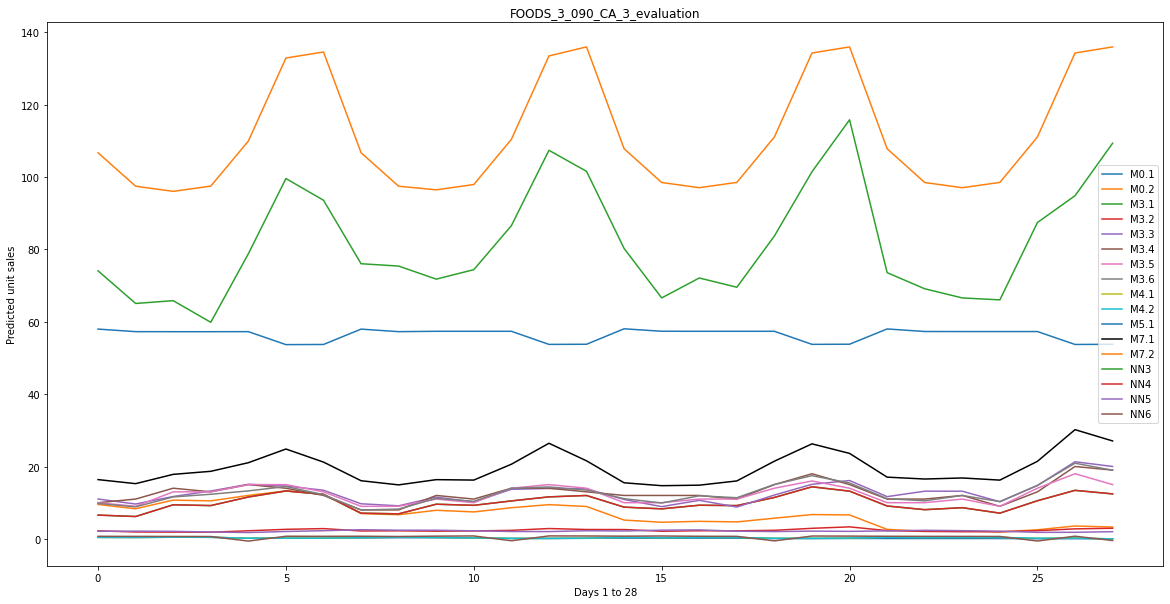

In [13]:
# From evaluation data
top_sellers = ['HOBBIES_1_234_CA_3_evaluation', 'HOUSEHOLD_1_118_CA_3_evaluation', 'FOODS_3_090_CA_3_evaluation']
plot_products(top_sellers)

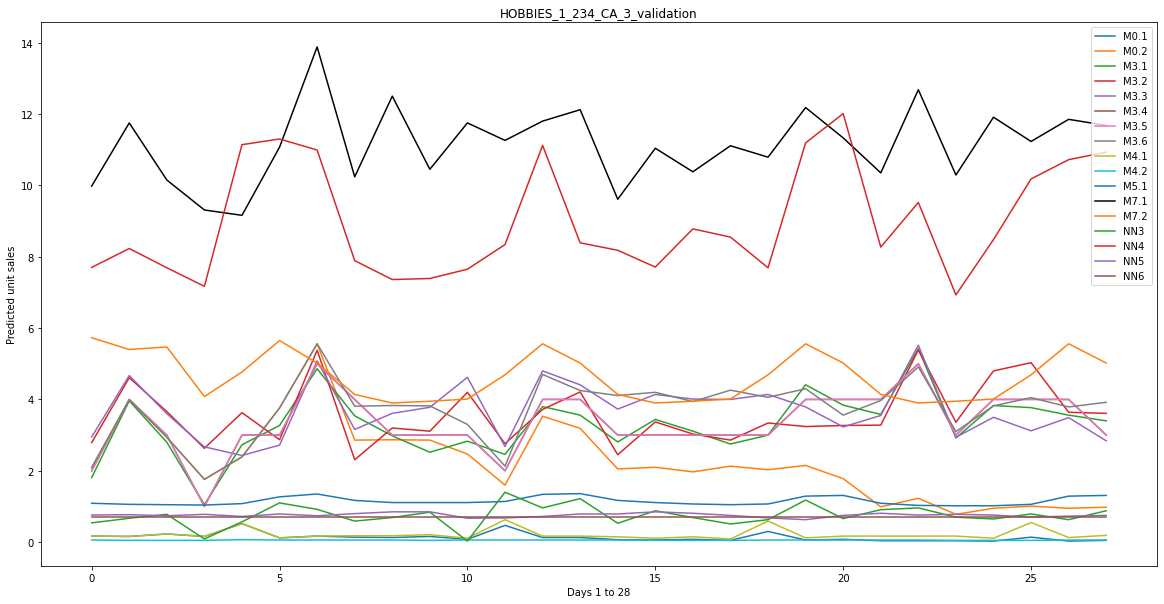

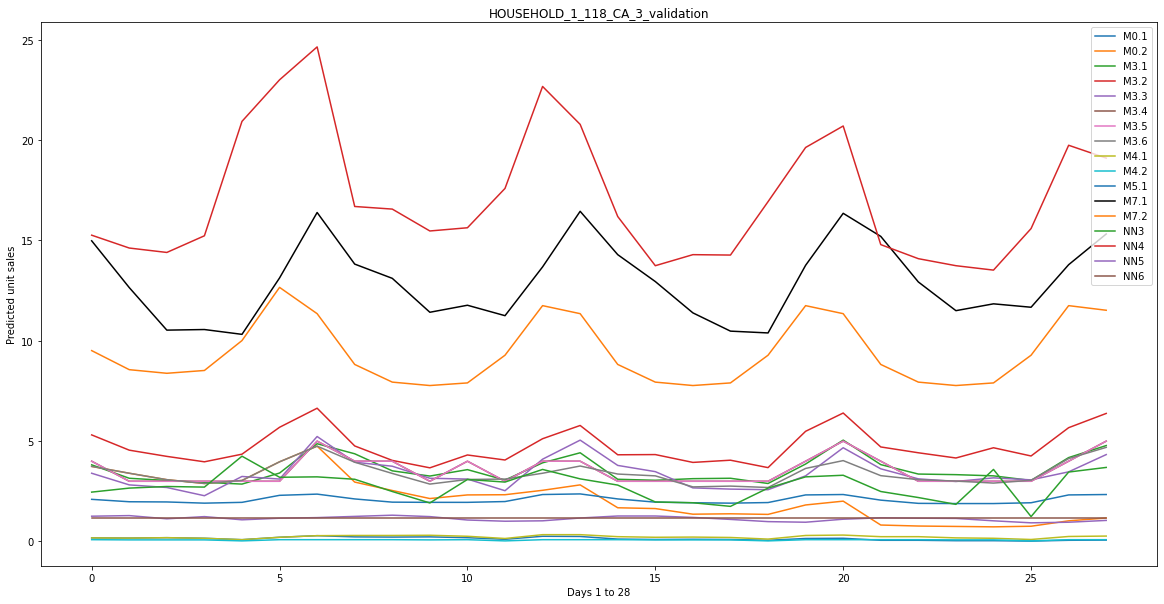

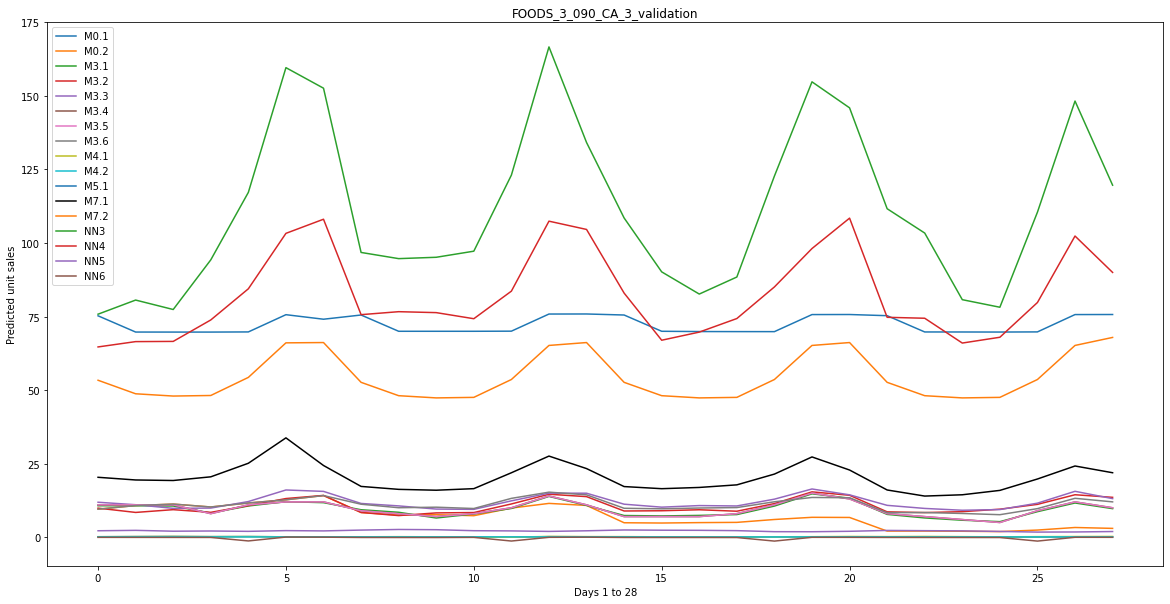

In [14]:
# From validation data
top_sellers = ['HOBBIES_1_234_CA_3_validation', 'HOUSEHOLD_1_118_CA_3_validation', 'FOODS_3_090_CA_3_validation']
plot_products(top_sellers)

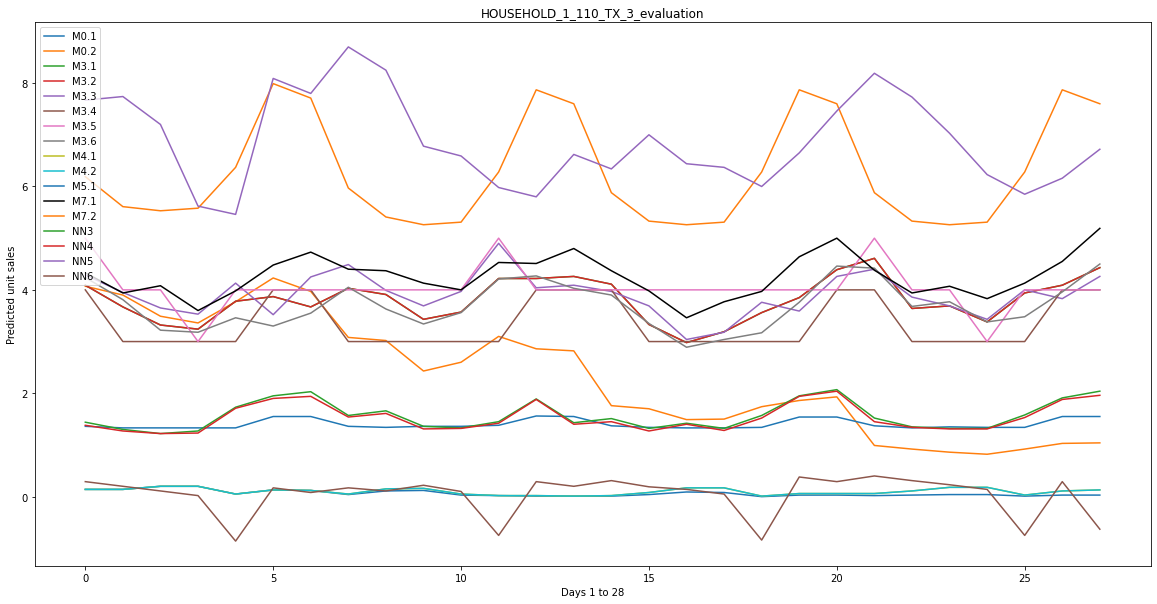

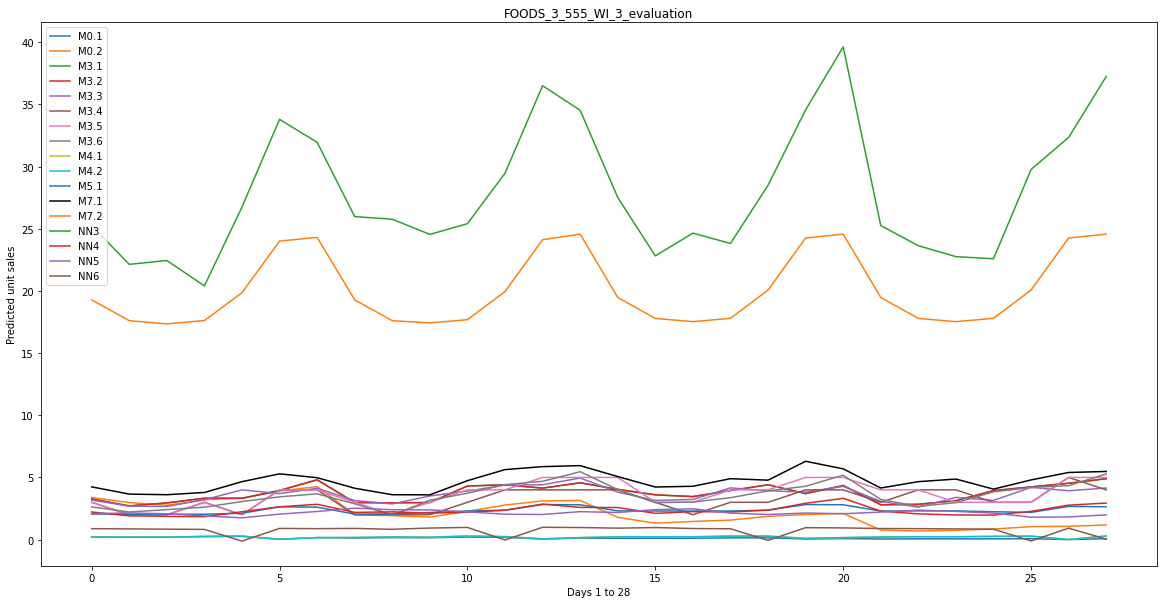

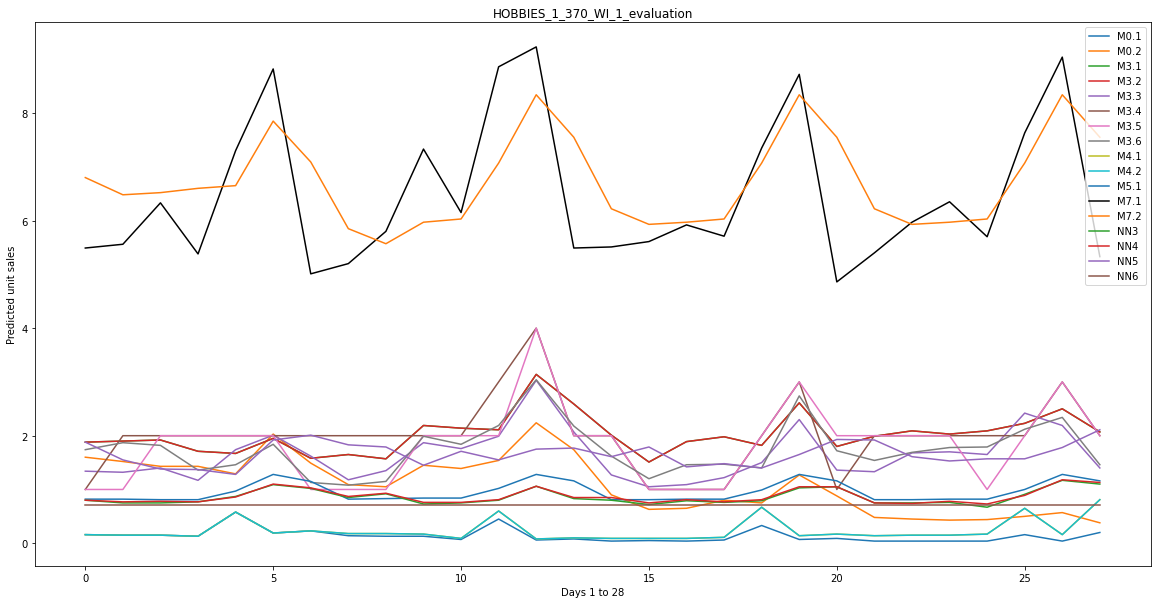

In [15]:
# As all topsellers are from CA_3 we lets plot some diverse products, these are also 
products = ['HOUSEHOLD_1_110_TX_3_evaluation',  'FOODS_3_555_WI_3_evaluation',  'HOBBIES_1_370_WI_1_evaluation']
plot_products(products)

# Summary of what we did and what results were reached for each model tried.

Till 5.3 the data was split by store then the model was fit. In 6.1 we tried to fit one model to entire data without splitting it. In 7.1 and 7.2 we split the data by dept instead of store.

Also, these are the basic columns we use in every ML Model we tried-
<br>id, item_id, dept_id, cat_id, store_id, state_id, d, unit_sale, date, day_of_week, month_no, day_of_month

These are extra columns we added to few models to check if we can get better results - 
<br>event or not, snap or not, sale price, total sale(unit sale * sale price), 
<br>moving average of sale price for 7,14,30,60,180 days.
<br>day of month, date, 
<br>moving average of unit sale for 7,14,30,60,180 days.

These models had only the basic columns and extra columns were not used for them.
<br>ML 0.2, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 5.1, 5.2, 6.1, 7.1, 7.2 .
<br>DL Model 3 uses LSTM and raw data of sales_train_ev and sales_train_val.
<br>Model 4 uses LSTM and raw data of sales_train_ev and sales_train_val.
<br>Model 5 uses LSTM and raw data of sales_train_ev and sales_train_val.
<br>Model 6 uses Long Form and Dense Layers only and all the columns including extra columns.

## ML Strategies

### Strategy 0.1

In this strategy we train on one year data only. 
<br>For eval data we train on (1941-365) to 1941 and predict on 1941 to 1969.
<br>For val data we train on (1913-365) to 1913 and predict on 1913 to 1941.

However we use four models to predict 28 days. First model predicts week1, second predicts week1 and week2, third predicts week1, week2, week3 and fourth model predicts week1, week2, week3, week4. Then we append 0 s to make all these predicted lists same length and then we take element wise mean to make the final prediction.

Though a good concept, it did not do well during submission.

### Strategy 0.2

Only differece from 0.1 model is that this one fits entire val data and previous one took only one year of val data.

### Strategy 1

As it is very complex, this one could not be run on my machine. So we move on to other simpler methods. This one should be ignored.

Training strategy used:
Train on data till 1829, predict on 1829 to 1857. Now for this prediction we will use 4 models, each model will predict one week of the 28 days of test data. This predicted data of X_test will be exchanged with true label next time, so we will be training on our prediction next next time.

This is repeated for next test sets as described below.

Train on data till 1857, predict on X_test of 1858 to 1885. Now for this prediction we will use 4 models, each model will predict one week of the 28 days of test data.This predicted data of X_test will be exchanged with true label next time, so we will be training on our prediction next next time.

Train on data till 1885, predict on X_test of 1886 to 1913. Now for this prediction we will use 4 models, each model will predict one week of the 28 days of test data.This predicted data of X_test will be exchanged with true label next time, so we will be training on our prediction next next time.

Train on data till 1913, predict on X_test of 1914 to 1941. Now for this prediction we will use 4 models, each model will predict one week of the 28 days of test data. This prediction is ultimate prediction for this store.

### Strategy 2

This method is fairly complex, it did well while training but submission scores were extremely bad.

Training strategy used:
Train on data till 1829, predict on X_test of 1829 to 1857. This predicted data of X_test will be exchanged with true label next time, so we will be training on our prediction next next time.

Train on data till 1857, predict on X_test of 1858 to 1885. This predicted data of X_test will be exchanged with true label next time, so we will be training on our prediction next next time.

Train on data till 1885, predict on X_test of 1886 to 1913. This predicted data of X_test will be exchanged with true label next time, so we will be training on our prediction next next time.

Train on data till 1913, predict on X_test of 1914 to 1941. This prediction is ultimate prediction for this store.

### Strategy 3.1

This strategy takes only columns added by feature_engineer() function, no more than that.
<br>For evaluation data it fits on only one year of data (1576 to 1941) and predicts 1942 to 1969. 
<br>But for validation it fits on entire data till 1913 and predicts 1914 to 1941.

### Strategy 3.2

This strategy takes only columns added by feature_engineer() function, no more than that.
<br>For evaluation data it fits on only one year of data (1576 to 1941) and predicts 1942 to 1969. 
<br>For validation again it fits on one year data 1913-365 to 1913.

### Strategy 3.3

This strategy takes only columns added by feature_engineer() function, no more than that.
<br>For evaluation data it fits on three years of data (1941-365-365-365 to 1941) and predicts 1942 to 1969. 
<br>For validation again it fits on three years data 1913-365-365-365 to 1913.

### Strategy 3.4

This strategy takes only columns added by feature_engineer() function, no more than that.
<br>For evaluation data it fits on entire data (0 to 1941) and predicts 1942 to 1969. 
<br>For validation again it fits on entire data 0 to 1913.

### Strategy 3.5

This strategy takes only columns added by feature_engineer() function, no more than that.
<br>For evaluation data it fits on two years data (1941-365-365 to 1941) and predicts 1942 to 1969. 
<br>For validation again it fits on entire data 0 to 1913.

### Strategy 3.6

This strategy takes only columns added by feature_engineer() function, no more than that.
<br>For evaluation data it fits on three years data (1941-365-365-365 to 1941) and predicts 1942 to 1969. 
<br>For validation again it fits on entire data 0 to 1913.

### Strategy 4.1

In this strategy we add all the columns we can add. Then we fit on one year of data only, both for eval and val data.
<br>For eval we train on 1941-365 to 1941, we test on 1941 to 1969.
<br>For val we train on 1913-365 to 1913 and we test on 1913 to 1969.

### Strategy 4.2

only change is that entire val data is fit.

### Strategy 5.1

Instead of LGBRegressor we try XGBRegressor. 
We fit one year data for eval and entire data for val.
We dont add more features than added by feature_engineer() function.

### Strategy 5.2

Instead of LGBRegressor we try XGBRegressor. 
We fit entire data for both eval and val. 
We dont add more features than added by feature_engineer() function.

### Strategy 5.3

Instead of LGBRegressor we try XGBRegressor. 
We fit entire data for both eval and val. 
We all the features we can.

### Strategy 6.1

This model could not be run due to lack of compute power, so there is no score attached.

In this strategy we wanted to fit one LGBM model to entire data. However our computation powers did not permit.

### Strategy 7.1

We fit an LGBM model on entire data separated by dept id. Hyperparameters found on sample of data with all features added.

### Strategy 7.2

We repeat the 7.1 strategy but this time we do another hyperparameter tuning.

## DL Strategies

### DL Model 3

We did not transform the data into long form. The sales_train_ev.csv and sales_train_val.csv were fed directly
and the model was LSTM based.

In this training strategy we dont go by store_by_store, we decided to split products into departments instead as 
same products may behave same across stores, this can be helpful for LSTM models as they depend on patterns.

However, entire data was used to do the training both for eval and val csv. This can be changed to try a different
approach where we use only 1 or 2 yr data as LSTMs are not good at remembering long sequences.

Our data split is like this: 
our model is created to take 1885 days input and 28 days output
for eval csv we use 28 to 1913 as xtrain and 1913 to 1941 as ytain, then we predict on 56 to 1941
for val csv we use 0 to 1885 as xtrain and 1885 to 1913 as ytain, then we predict on 28 to 1913

so both the times we are predicting 28 days and it is 1941 to 1969 for eval and 1913 to 1941 for val.

df - can be sales_train_ev or sales_train_validation
dept_id - can be any of the 7 dept products belong to as ['HOBBIES_1', 'HOBBIES_2', 'FOODS_1','FOODS_2','FOODS_3',
                                                         'HOUSEHOLD_1','HOUSEHOLD_2', ]

epoch_no - we keep changing it because different dept requires different model, different target_loss and different epoch no

model - we might use different models for different departments

### DL Model 4

In [17]:
# we dont transform the data into long form, we just take the sales_train_ev.csv or sales_train_val.csv and split it
# by dept and train model on it. Our model will be LSTM based.

#          -------xtrain---.--ytrain---
#              (1548-1913)  (1913-1941)
#            ------------xtest---------
#                     (1520-1941)

#            xtrain-----.ytrain-
#   (1548 to (1913-28))   ((1913-28) to 1913)
#            -------xtest-------
#           ((1913-365) to 1913)

### DL Model 5

In [ ]:
# We dont transform the data into long form and the models are LSTM based.
# eval
#         xtr_from, xtr_to, ytr_to = 116, 453, 481        we train model 1 on this data
#         xtr_from, xtr_to, ytr_to = 481, 818, 846        we train model 2 on this data
#         xtr_from, xtr_to, ytr_to = 846, 1183, 1211      we train model 3 on this data
#         xtr_from, xtr_to, ytr_to = 1211, 1548, 1576     we train model 4 on this data

#         xte_from, xte_to = 1604, 1941                   we predict on this data with each model and take 
#                                                         mean of the predictions as our final prediction.
#                                                         same is done for validation data.
# val
#         xtr_from, xtr_to, ytr_to = 88, 425, 453
#         xtr_from, xtr_to, ytr_to = 453, 790, 818
#         xtr_from, xtr_to, ytr_to = 818, 1155, 1183
#         xtr_from, xtr_to, ytr_to = 1183, 1520, 1548

#         xte_from, xte_to = 1576, 1913

### DL Model 6

We converted the data into lon form as we did in ML models, then we fit dense layer based model and try different models on different departments.